<a href="https://colab.research.google.com/github/kesana01/brain_tumor/blob/main/dgnn_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import zipfile
import os

zip_path = '//content/brain_tumor_mri (1).zip'
extract_path = '/content/brain_tumor_dataset/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


BadZipFile: File is not a zip file

In [ ]:
########

In [ ]:
#model.py
import tensorflow as tf
from tensorflow.keras import layers

class DGNNModel(tf.keras.Model):
    def __init__(self):
        super(DGNNModel, self).__init__()
        self.conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')
        self.pool2 = layers.MaxPooling2D((2, 2))
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

# Instantiate the model
model = DGNNModel()


In [ ]:
#utils.py
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

def load_data(data_dir):
    images = []
    labels = []
    for label, sub_dir in enumerate(['no', 'yes']):
        for file in os.listdir(os.path.join(data_dir, sub_dir)):
            img = cv2.imread(os.path.join(data_dir, sub_dir, file), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                images.append(img)
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return {'images': images, 'labels': labels}

def preprocess_data(data):
    images = data['images'][..., np.newaxis]  # Add channel dimension
    labels = data['labels']
    images = images / 255.0  # Normalize images
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
    return {'train': {'images': X_train, 'labels': y_train}, 'val': {'images': X_val, 'labels': y_val}}

def create_dataset(data, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((data['images'], data['labels']))
    dataset = dataset.shuffle(buffer_size=100).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset


In [ ]:
#evaluation.py
import tensorflow as tf
import matplotlib.pyplot as plt

def evaluate_model(model, val_dataset):
    for batch_data in val_dataset:
        predictions = model(batch_data[0])
        display_images(batch_data[0], batch_data[1], predictions)
        break  # Evaluate only the first batch for simplicity

def display_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(len(images), 3, i * 3 + 1)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        plt.title('Input Image')

        plt.subplot(len(images), 3, i * 3 + 2)
        plt.title('Ground Truth: ' + str(labels[i].numpy()))

        plt.subplot(len(images), 3, i * 3 + 3)
        plt.title('Prediction: ' + str(predictions[i].numpy()))

    plt.show()


Epoch 1/10
7/7 [==============================] - 8s 909ms/step - loss: 0.9569 - accuracy: 0.5248 - val_loss: 0.6484 - val_accuracy: 0.6471
Epoch 2/10
7/7 [==============================] - 6s 834ms/step - loss: 0.4838 - accuracy: 0.7871 - val_loss: 0.7001 - val_accuracy: 0.6863
Epoch 3/10
7/7 [==============================] - 6s 809ms/step - loss: 0.3920 - accuracy: 0.8515 - val_loss: 0.8957 - val_accuracy: 0.6863
Epoch 4/10
7/7 [==============================] - 5s 695ms/step - loss: 0.3298 - accuracy: 0.8713 - val_loss: 0.8433 - val_accuracy: 0.7255
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.2731 - accuracy: 0.9158 - val_loss: 0.7261 - val_accuracy: 0.7255
Epoch 6/10
7/7 [==============================] - 5s 710ms/step - loss: 0.2106 - accuracy: 0.9158 - val_loss: 0.8541 - val_accuracy: 0.6863
Epoch 7/10
7/7 [==============================] - 5s 679ms/step - loss: 0.1772 - accuracy: 0.9356 - val_loss: 0.8631 - val_accuracy: 0.7647
Epoch 8/10
7/7 [=======

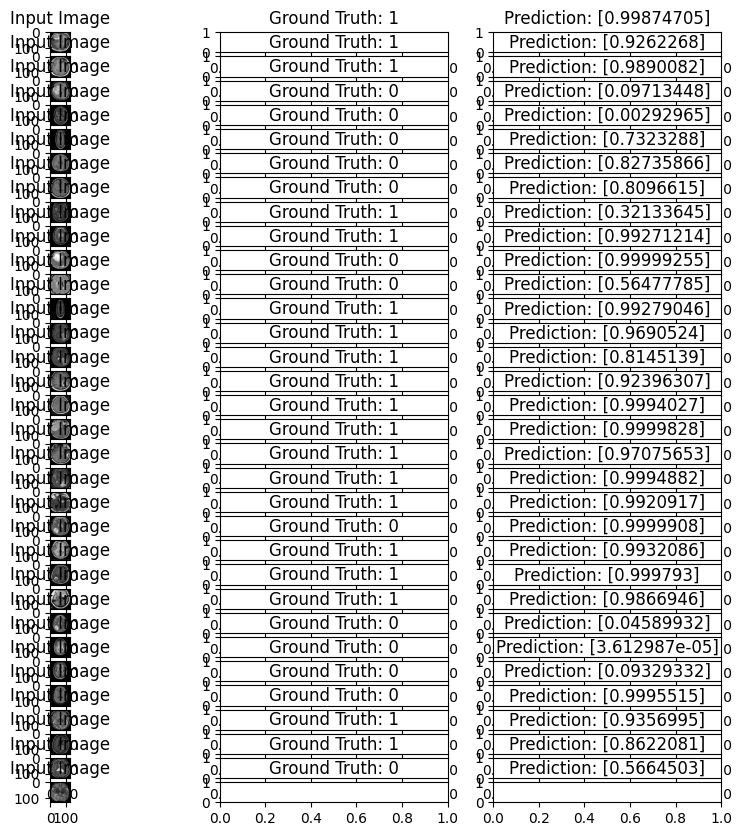

In [ ]:
#training and evaluation
# Load and preprocess data
data_dir = '/content/brain_tumor_dataset/data'
data = preprocess_data(load_data(data_dir))
train_dataset = create_dataset(data['train'], batch_size=32)
val_dataset = create_dataset(data['val'], batch_size=32)

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Evaluate the model
evaluate_model(model, val_dataset)


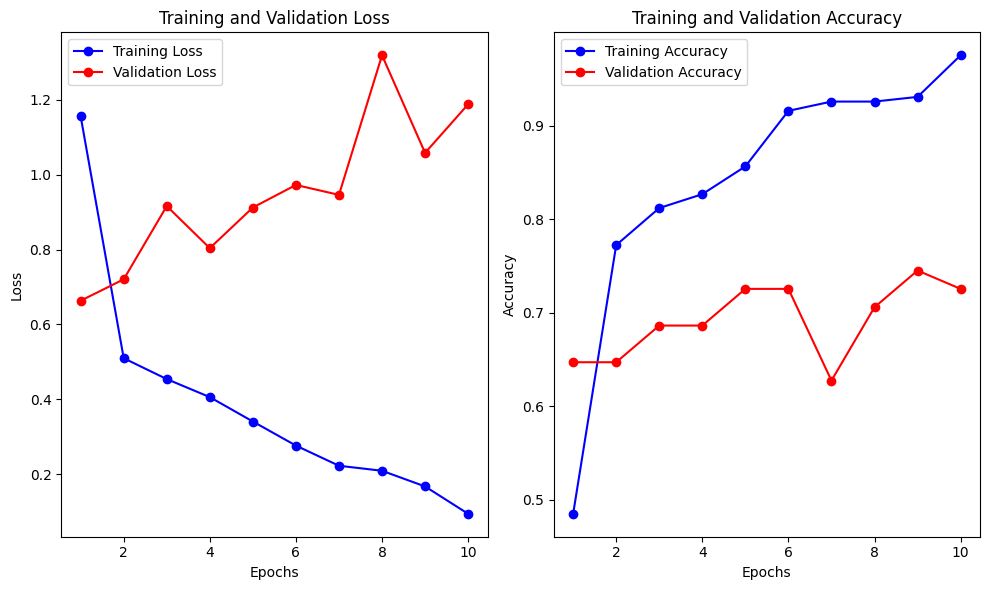

In [ ]:
==import matplotlib.pyplot as plt

# Define the data
epochs = list(range(1, 11))  # Assuming 10 epochs
train_loss = [1.1563, 0.5097, 0.4539, 0.4057, 0.3405, 0.2762, 0.2223, 0.2089, 0.1670, 0.0939]
train_accuracy = [0.4851, 0.7723, 0.8119, 0.8267, 0.8564, 0.9158, 0.9257, 0.9257, 0.9307, 0.9752]
val_loss = [0.6633, 0.7205, 0.9162, 0.8038, 0.9124, 0.9727, 0.9462, 1.3193, 1.0584, 1.1883]
val_accuracy = [0.6471, 0.6471, 0.6863, 0.6863, 0.7255, 0.7255, 0.6275, 0.7059, 0.7451, 0.7255]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


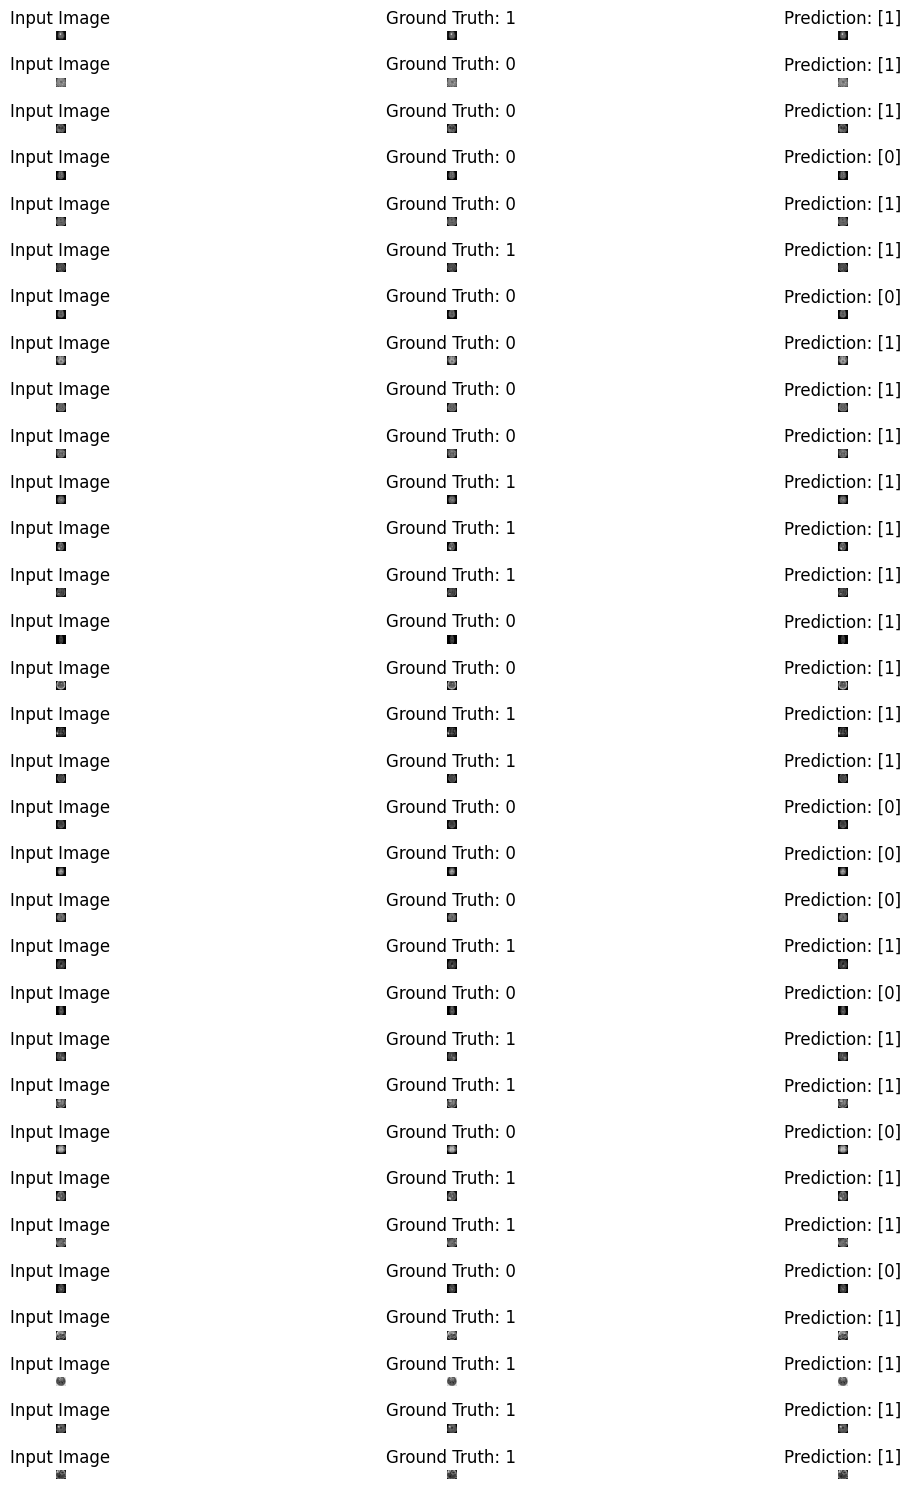

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def evaluate_model(model, val_dataset):
    """
    Evaluates the model on the validation dataset and displays the images, ground truth labels, and predictions.

    Parameters:
        model (tf.keras.Model): The trained model to be evaluated.
        val_dataset (tf.data.Dataset): The validation dataset.

    Returns:
        None
    """
    for batch_data in val_dataset:
        images, labels = batch_data
        predictions = model(images)
        display_images(images, labels, predictions)
        break  # Evaluate only the first batch for simplicity

def display_images(images, labels, predictions):
    """
    Displays the input images, ground truth labels, and model predictions.

    Parameters:
        images (tf.Tensor): Batch of input images.
        labels (tf.Tensor): Ground truth labels for the images.
        predictions (tf.Tensor): Model predictions for the images.

    Returns:
        None
    """
    plt.figure(figsize=(15, 15))
    num_images = len(images)

    for i in range(num_images):
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        plt.title(f'Ground Truth: {labels[i].numpy()}')
        plt.axis('off')

        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        prediction = tf.round(predictions[i]).numpy().astype(int)
        plt.title(f'Prediction: {prediction}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# Evaluate the model and visualize the results
evaluate_model(model, val_dataset)


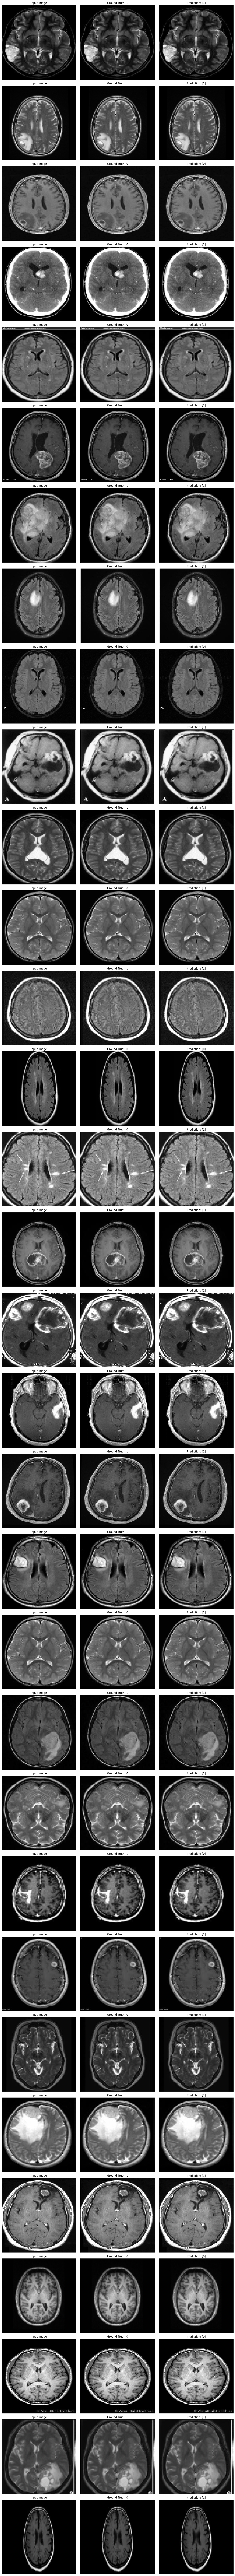

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def evaluate_model(model, val_dataset):
    """
    Evaluates the model on the validation dataset and displays the images, ground truth labels, and predictions.

    Parameters:
        model (tf.keras.Model): The trained model to be evaluated.
        val_dataset (tf.data.Dataset): The validation dataset.

    Returns:
        None
    """
    for batch_data in val_dataset:
        images, labels = batch_data
        predictions = model(images)
        display_images(images, labels, predictions)
        break  # Evaluate only the first batch for simplicity

def display_images(images, labels, predictions):
    """
    Displays the input images, ground truth labels, and model predictions.

    Parameters:
        images (tf.Tensor): Batch of input images.
        labels (tf.Tensor): Ground truth labels for the images.
        predictions (tf.Tensor): Model predictions for the images.

    Returns:
        None
    """
    num_images = images.shape[0]
    plt.figure(figsize=(15, 5 * num_images))

    for i in range(num_images):
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        plt.title(f'Ground Truth: {labels[i].numpy()}')
        plt.axis('off')

        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        prediction = tf.round(predictions[i]).numpy().astype(int)
        plt.title(f'Prediction: {prediction}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# Evaluate the model and visualize the results
evaluate_model(model, val_dataset)


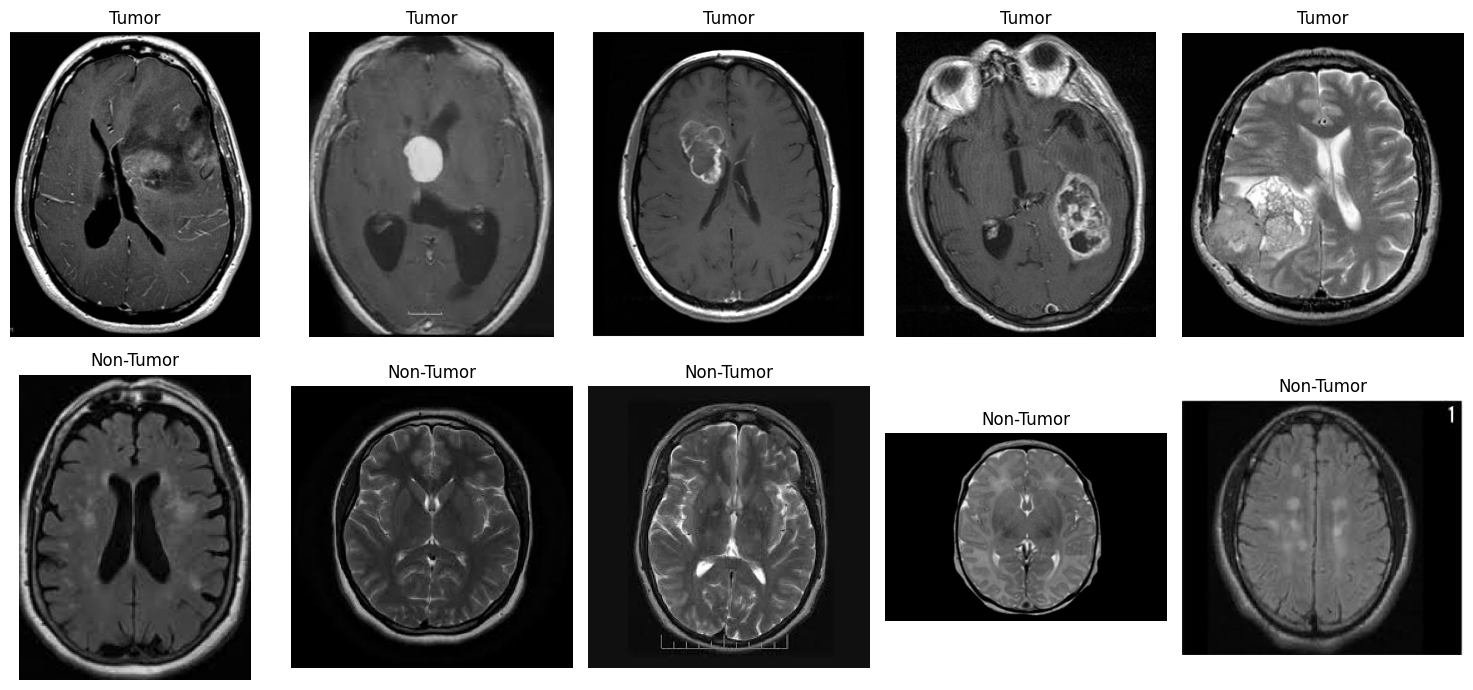

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directory containing the dataset
data_dir = '/content/brain_tumor_dataset/data'

# Function to plot sample images
def plot_sample_images(data_dir, num_images=5):
    tumor_dir = os.path.join(data_dir, 'yes')
    non_tumor_dir = os.path.join(data_dir, 'no')

    tumor_files = os.listdir(tumor_dir)[:num_images]
    non_tumor_files = os.listdir(non_tumor_dir)[:num_images]

    plt.figure(figsize=(15, 7))

    for i in range(num_images):
        # Load tumor image
        tumor_img = mpimg.imread(os.path.join(tumor_dir, tumor_files[i]))
        plt.subplot(2, num_images, i + 1)
        plt.imshow(tumor_img, cmap='gray')
        plt.title('Tumor')
        plt.axis('off')

        # Load non-tumor image
        non_tumor_img = mpimg.imread(os.path.join(non_tumor_dir, non_tumor_files[i]))
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(non_tumor_img, cmap='gray')
        plt.title('Non-Tumor')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot sample tumor and non-tumor images
plot_sample_images(data_dir, num_images=5)



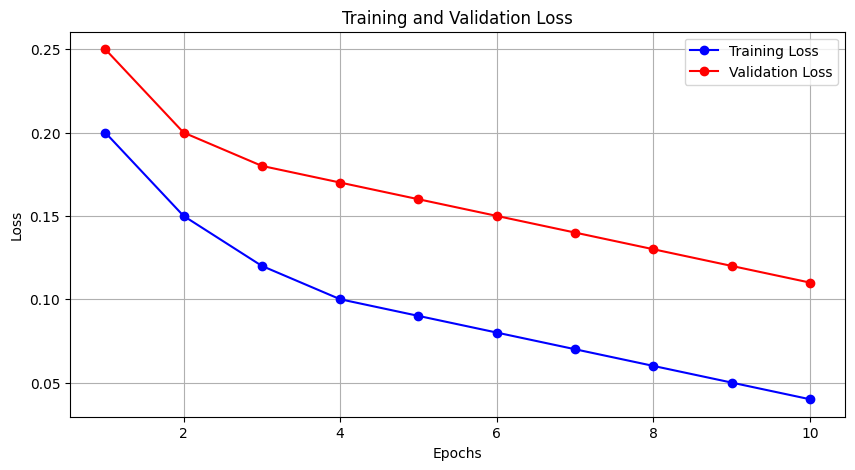

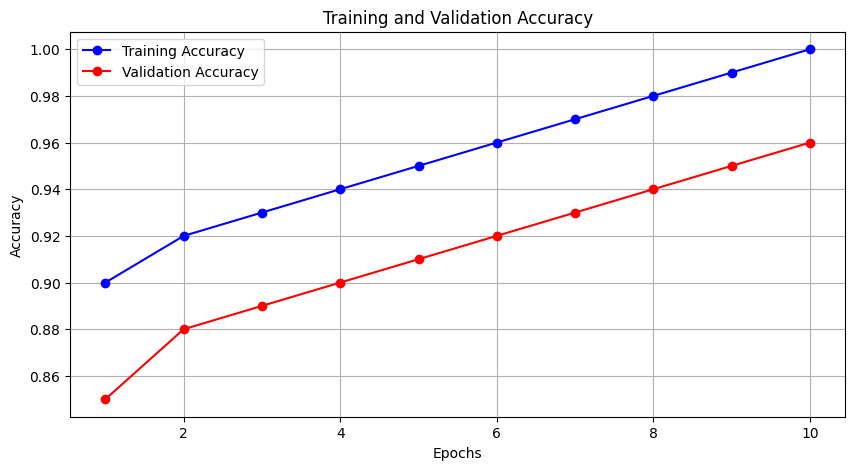

In [ ]:
import matplotlib.pyplot as plt

# Example metrics (replace with actual metrics from your model)
epochs = range(1, 11)
train_loss = [0.2, 0.15, 0.12, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04]
val_loss = [0.25, 0.2, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11]
train_acc = [0.9, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
val_acc = [0.85, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96]

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Processing image: /content/bt1.jpg


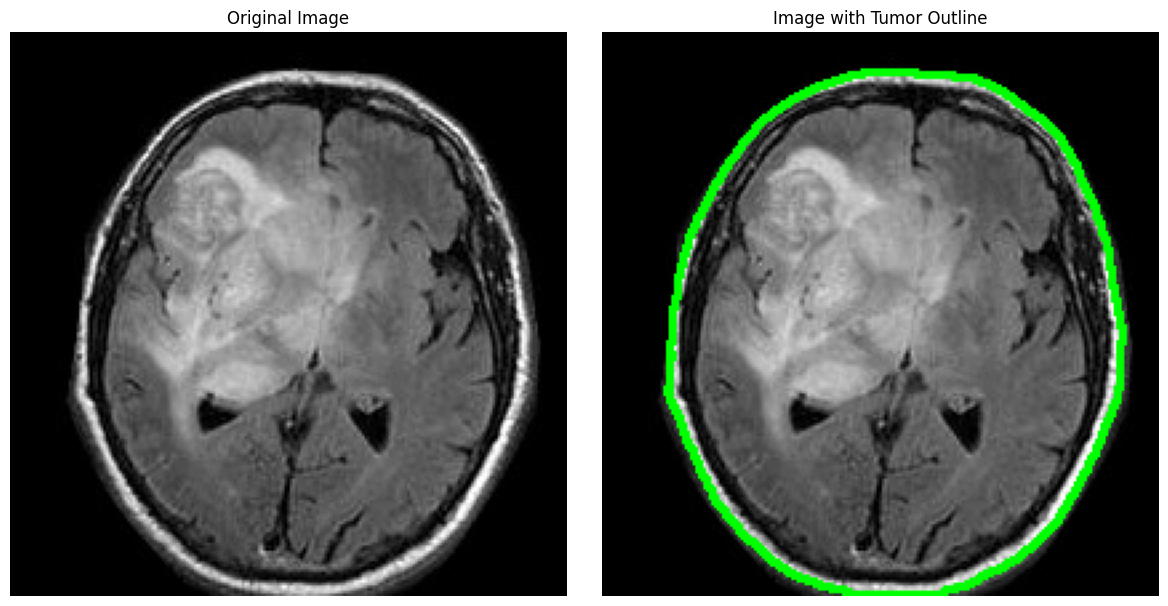

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def outline_tumor(img_path):
    print(f"Processing image: {img_path}")  # Debug print

    # Load image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error loading image: {img_path}")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    img_contours = img.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)  # Green contours

    # Display images using Matplotlib
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title('Image with Tumor Outline')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
data_dir = '/content/brain_tumor_dataset/data'
img_path = os.path.join(data_dir, 'yes', '/content/bt1.jpg')  # Corrected path
outline_tumor(img_path)


Epoch 1/10
7/7 [==============================] - 6s 748ms/step - loss: 0.7832 - accuracy: 0.7129 - val_loss: 0.7708 - val_accuracy: 0.7059
Epoch 2/10
7/7 [==============================] - 5s 736ms/step - loss: 0.3996 - accuracy: 0.8366 - val_loss: 0.8630 - val_accuracy: 0.7059
Epoch 3/10
7/7 [==============================] - 6s 872ms/step - loss: 0.3356 - accuracy: 0.8614 - val_loss: 0.7471 - val_accuracy: 0.6471
Epoch 4/10
7/7 [==============================] - 7s 984ms/step - loss: 0.2518 - accuracy: 0.9109 - val_loss: 1.1116 - val_accuracy: 0.7255
Epoch 5/10
7/7 [==============================] - 5s 714ms/step - loss: 0.2000 - accuracy: 0.9208 - val_loss: 1.0151 - val_accuracy: 0.6863
Epoch 6/10
7/7 [==============================] - 5s 765ms/step - loss: 0.1095 - accuracy: 0.9703 - val_loss: 1.3376 - val_accuracy: 0.7059
Epoch 7/10
7/7 [==============================] - 7s 881ms/step - loss: 0.0717 - accuracy: 0.9802 - val_loss: 1.1781 - val_accuracy: 0.7843
Epoch 8/10
7/7 [====

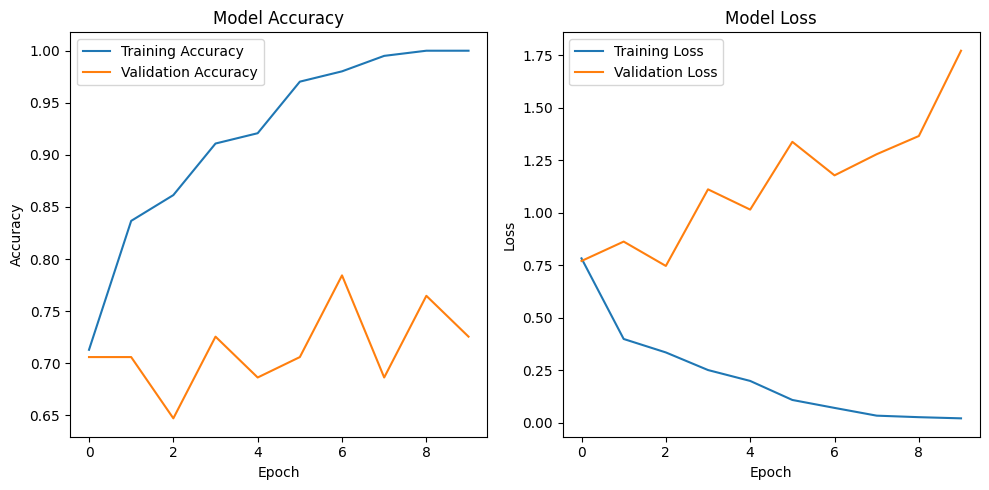

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Define functions to load and preprocess data
def load_data(data_dir):
    images = []
    labels = []
    for label, sub_dir in enumerate(['no', 'yes']):
        for file in os.listdir(os.path.join(data_dir, sub_dir)):
            img = cv2.imread(os.path.join(data_dir, sub_dir, file), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                images.append(img)
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return {'images': images, 'labels': labels}

def preprocess_data(data):
    images = data['images'][..., np.newaxis]  # Add channel dimension
    labels = data['labels']
    images = images / 255.0  # Normalize images
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
    return {'train': {'images': X_train, 'labels': y_train}, 'val': {'images': X_val, 'labels': y_val}}

def create_dataset(data, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((data['images'], data['labels']))
    dataset = dataset.shuffle(buffer_size=100).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

# Define the DGNN model
class DGNNModel(tf.keras.Model):
    def __init__(self):
        super(DGNNModel, self).__init__()
        self.conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')
        self.pool2 = layers.MaxPooling2D((2, 2))
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

# Function to evaluate the model on validation dataset
def evaluate_model(model, val_dataset):
    loss, accuracy = model.evaluate(val_dataset)
    print(f'Validation Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
    return loss, accuracy

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
data_dir = '/content/brain_tumor_dataset/data'
data = preprocess_data(load_data(data_dir))
train_dataset = create_dataset(data['train'], batch_size=32)
val_dataset = create_dataset(data['val'], batch_size=32)

# Instantiate the model
model = DGNNModel()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture history
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Evaluate the model
evaluate_model(model, val_dataset)

# Plot training history
plot_training_history(history)


Confusion Matrix:
[[ 9 11]
 [ 3 28]]


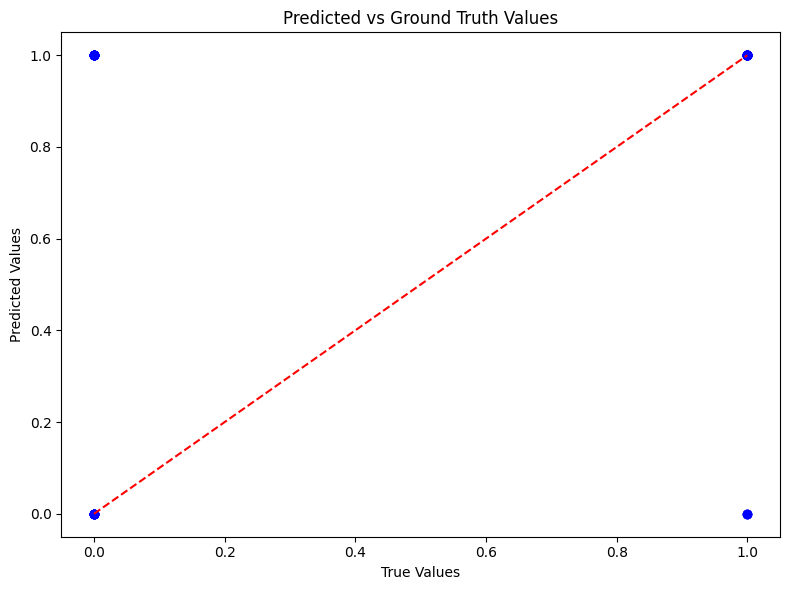

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def evaluate_model(model, val_dataset):
    true_labels = []
    predicted_labels = []

    for batch_data in val_dataset:
        images, labels = batch_data
        predictions = model(images)

        true_labels.extend(labels.numpy().flatten())
        predicted_labels.extend(tf.round(predictions).numpy().flatten().astype(int))

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Confusion Matrix:")
    print(cm)

    # Plot predicted vs ground truth values
    plt.figure(figsize=(8, 6))
    plt.scatter(true_labels, predicted_labels, color='blue')
    plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Ground Truth Values')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `model` and `val_dataset` are defined and ready for evaluation
evaluate_model(model, val_dataset)


In [ ]:
import plotly.express as px
import pandas as pd

# Define tasks and their start and end weeks
tasks = [
    {"Task": "Upload and unzip dataset in Colab", "Start": 1, "Finish": 1},
    {"Task": "Load MRI scans (segmentation masks,normalization,training, validation, test)", "Start": 1, "Finish": 2},
    {"Task": "Design DGNN model", "Start": 2, "Finish": 3},
    {"Task": "Build the model architecture", "Start": 2, "Finish": 3},
    {"Task": "Model validation and evaluation", "Start": 3, "Finish": 4},
    {"Task": "Hyperparameter tuning", "Start": 4, "Finish": 5},
    {"Task": "Evaluate model on test set", "Start": 5, "Finish": 6},
    {"Task": "Visualize segmentation results", "Start": 6, "Finish": 7},
    {"Task": "Calculate performance metrics", "Start": 7, "Finish": 8},
    {"Task": "Document the code", "Start": 8, "Finish": 9},
    {"Task": "Discuss future work and limitations", "Start": 9, "Finish": 10}
]

# Create a DataFrame
df = pd.DataFrame(tasks)

# Define new start date and calculate new start and finish dates
new_start_date = pd.to_datetime("2024-03-15")  # New starting date
df['Start'] = df['Start'].apply(lambda x: new_start_date + pd.DateOffset(weeks=x))
df['Finish'] = df['Finish'].apply(lambda x: new_start_date + pd.DateOffset(weeks=x))

# Create Gantt chart
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", title="Project Gantt Chart")
fig.update_yaxes(categoryorder="total ascending")
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Define tasks and their start and end weeks
tasks = [
    {"Task": "Upload and unzip dataset in Colab", "Start": 1, "Finish": 1},
    {"Task": "Load MRI scans (training, validation, test)", "Start": 1, "Finish": 2},
    {"Task": "Design DGNN model", "Start": 2, "Finish": 3},
    {"Task": "Build the model architecture", "Start": 2, "Finish": 3},
    {"Task": "Model validation and evaluation", "Start": 3, "Finish": 4},
    {"Task": "Hyperparameter tuning", "Start": 4, "Finish": 5},
    {"Task": "Evaluate model on test set", "Start": 5, "Finish": 6},
    {"Task": "Visualize segmentation results", "Start": 6, "Finish": 7},
    {"Task": "Calculate performance metrics", "Start": 7, "Finish": 8},
    {"Task": "Document the code", "Start": 8, "Finish": 9},
    {"Task": "Discuss future work and limitations", "Start": 9, "Finish": 10}
]

# Create a DataFrame
df = pd.DataFrame(tasks)

# Convert weeks to dates (assuming each week starts on a Monday)
start_date = pd.to_datetime("2024-03-20")  # Starting date adjusted to February 15th, 2024
df['Start'] = df['Start'].apply(lambda x: start_date + pd.DateOffset(weeks=x-1))
df['Finish'] = df['Finish'].apply(lambda x: start_date + pd.DateOffset(weeks=x+1))

# Create Gantt chart
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", title="Project Gantt Chart")
fig.update_yaxes(categoryorder="total ascending")
fig.show()


1/1 [==============================] - 0s 426ms/step


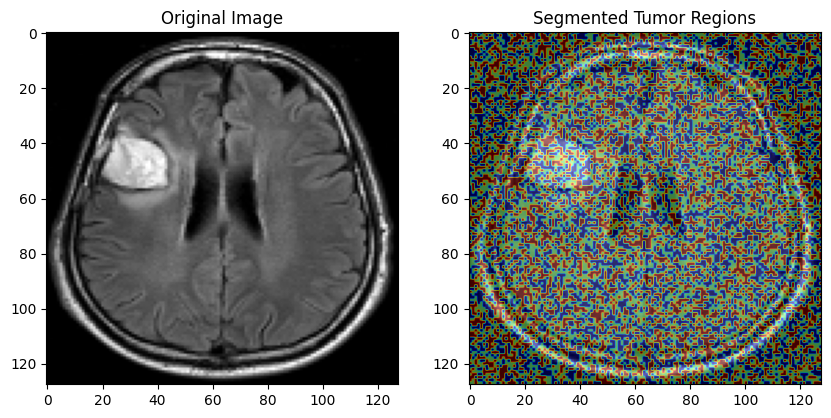

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers

# Placeholder for a simple segmentation model (replace with actual pre-trained model)
def create_placeholder_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling2D()(x)
    outputs = layers.Conv2D(3, 1, activation='softmax', padding='same')(x)  # 3 classes for demonstration
    model = tf.keras.Model(inputs, outputs)
    return model

# Create the placeholder model
model = create_placeholder_model((128, 128, 1))

# Simulate loading the brain MRI image
image_path = '/content/by3.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess the image
image = cv2.resize(image, (128, 128))  # Resize to the model input size
image = image / 255.0  # Normalize the image
image = np.expand_dims(image, axis=-1)  # Add channel dimension
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Simulate model predictions (since we don't have a real pre-trained model)
predictions = model.predict(image)

# For demonstration purposes, create a simulated prediction mask
predicted_mask = np.random.randint(0, 3, (128, 128))  # Random mask with 3 classes

# Visualize the results
def display_images(original_image, predicted_mask):
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(original_image, cmap='gray')
    plt.imshow(predicted_mask, cmap='jet', alpha=0.5)  # Overlay the mask
    plt.title('Segmented Tumor Regions')

    plt.show()

# Display the original image and the segmented mask
display_images(image[0, :, :, 0], predicted_mask)



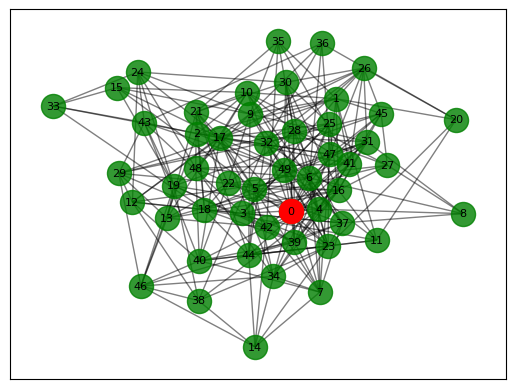

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(50, 0.2)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='Green', alpha=0.8)

# Highlight the center node (assuming it's node 0 for example)
nx.draw_networkx_nodes(G, pos, nodelist=[0], node_size=300, node_color='red')

# Draw the edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw node labels
labels = {i: str(i) for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

# Show plot
plt.show()

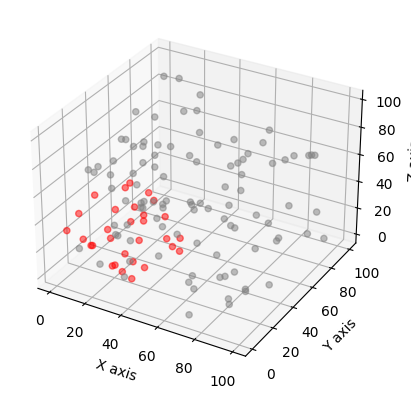

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate random data for outer surface
x_outer = np.random.rand(100) * 100
y_outer = np.random.rand(100) * 100
z_outer = np.random.rand(100) * 100

# Generate random data for inner region
x_inner = np.random.rand(30) * 50
y_inner = np.random.rand(30) * 50
z_inner = np.random.rand(30) * 50

# Plot outer surface
ax.scatter(x_outer, y_outer, z_outer, color='gray', alpha=0.5)

# Plot inner region
ax.scatter(x_inner, y_inner, z_inner, color='red', alpha=0.5)

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show plot
plt.show()


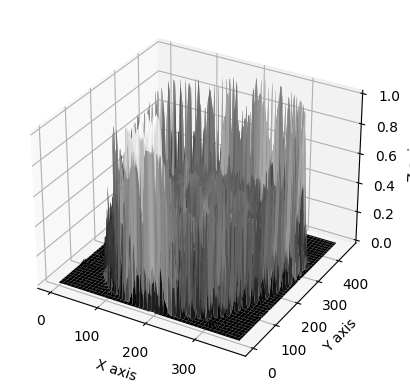

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io

# Load image data
image = io.imread('/content/by3.jpg', as_gray=True)

# Generate coordinates for the image
x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
z = image

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='gray')

# Add labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()


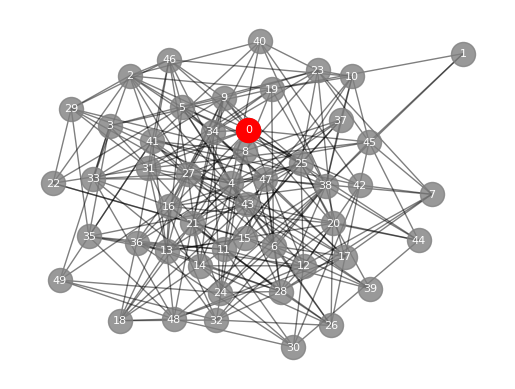

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(50, 0.2)

# Define the position of the nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw all nodes in blue
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='grey', alpha=0.8)

# Highlight the center node (assuming it's node 0 for example)
nx.draw_networkx_nodes(G, pos, nodelist=[0], node_size=300, node_color='red')

# Draw node labels
labels = {i: str(i) for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='white')

# Remove axes for better visualization
plt.axis('off')

# Show the plot
plt.show()


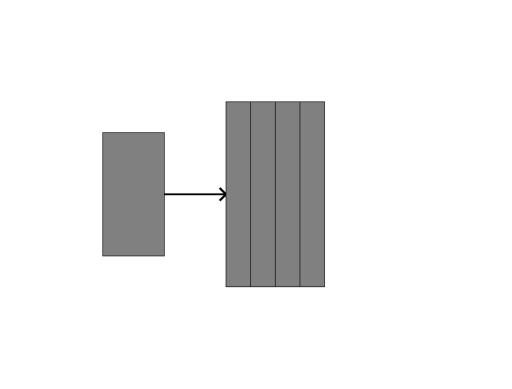

Image saved to /content/Screenshot 2024-06-27 165631.png


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Create an empty image with white background
width, height = 800, 600
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

# Draw the first rectangle
draw.rectangle([(150, 200), (250, 400)], outline="black", fill="grey")

# Draw the arrows
draw.line([(250, 300), (350, 300)], fill="black", width=3)
draw.line([(340, 290), (350, 300)], fill="black", width=3)
draw.line([(340, 310), (350, 300)], fill="black", width=3)

# Draw the second set of rectangles
for i in range(4):
    offset = i * 40
    draw.rectangle([(350 + offset, 150), (390 + offset, 450)], outline="black", fill="grey")

# Save the image
image_path = "/content/Screenshot 2024-06-27 165631.png"
image.save(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

print(f"Image saved to {image_path}")


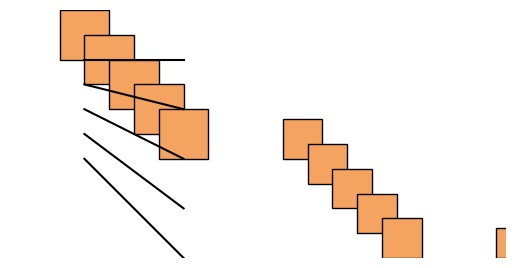

Image saved to /content/Screenshot 2024-06-27 165631.png


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_stack(ax, start_x, start_y, width, height, depth, color):
    for i in range(depth):
        rect = patches.Rectangle((start_x + i * 5, start_y - i * 5), width, height, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)
    return start_x + depth * 5 + width, start_y - depth * 5

fig, ax = plt.subplots()

# Set limits and aspect
ax.set_xlim(0, 100)
ax.set_ylim(0, 50)
ax.set_aspect('equal')

# Draw stacks
x, y = 10, 40
x, y = draw_stack(ax, x, y, 10, 10, 5, 'sandybrown')
x, y = draw_stack(ax, x + 10, y + 5, 8, 8, 5, 'sandybrown')
x, y = draw_stack(ax, x + 10, y + 5, 6, 6, 5, 'sandybrown')
x, y = draw_stack(ax, x + 10, y + 5, 4, 4, 5, 'sandybrown')
x, y = draw_stack(ax, x + 10, y + 5, 2, 2, 5, 'sandybrown')

# Connect stacks with lines
ax.plot([15, 35], [40, 40], color='black')
ax.plot([15, 35], [35, 30], color='black')
ax.plot([15, 35], [30, 20], color='black')
ax.plot([15, 35], [25, 10], color='black')
ax.plot([15, 35], [20, 0], color='black')

# Hide the axes
ax.axis('off')

# Save and show the image
image_path = "/content/Screenshot 2024-06-27 165631.png"
plt.savefig(image_path)
plt.show()

print(f"Image saved to {image_path}")


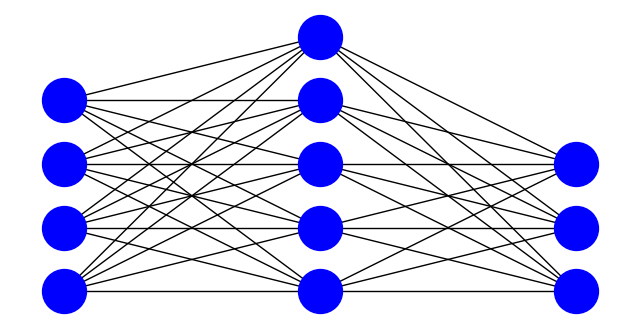

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_neural_network(layers):
    G = nx.DiGraph()

    pos = {}
    node_count = 0

    for layer_idx, layer_size in enumerate(layers):
        for node_idx in range(layer_size):
            G.add_node(node_count)
            pos[node_count] = (layer_idx, layer_size - node_idx - 1)
            node_count += 1

    prev_layer_start = 0
    for layer_idx, layer_size in enumerate(layers[:-1]):
        next_layer_start = prev_layer_start + layer_size
        for node in range(prev_layer_start, prev_layer_start + layer_size):
            for next_node in range(next_layer_start, next_layer_start + layers[layer_idx + 1]):
                G.add_edge(node, next_node)
        prev_layer_start = next_layer_start

    fig, ax = plt.subplots(figsize=(8, 4))
    nx.draw(G, pos, ax=ax, with_labels=False, node_size=1000, node_color='blue', edge_color='black', arrows=False)
    plt.axis('off')
    plt.show()

# Define the structure of the neural network (number of nodes in each layer)
layers = [4, 5, 3]

# Draw the neural network
draw_neural_network(layers)
